# DATA PREPARATION

Load and preprocess the data

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# load the data
data = pd.read_csv("ecommerce.csv")
data['last_purchase_date'] = data['InvoiceDate']
# Feature engineering: RFM metrics
data['Recency'] = (pd.Timestamp.today() - pd.to_datetime(data['last_purchase_date'])).dt.days
data['Frequency'] = data['Quantity']
data['Monetary'] = data['UnitPrice']

# Normalize features for clustering
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(data[['Recency', 'Frequency', 'Monetary']])
rfm_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Clustering

## Apply K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [15]:
# Find the Optimal number of clusters using the Elbow Method 
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(rfm_df)
    inertia.append(kmeans.inertia_)

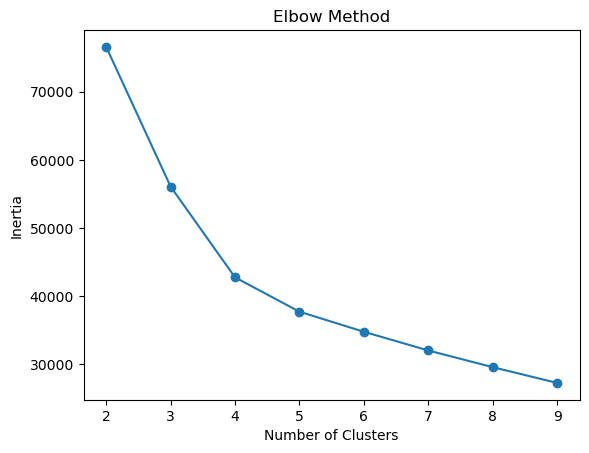

In [16]:
# Plot the Elbow Curve
plt.plot(range(2, 10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [18]:
# Fit K-Means with optimal clusters 
optimal_clusters = 4 # Based on the Elbow Curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Clusters'] = kmeans.fit_predict(rfm_df)

In [ ]:
# Evaluate clustering
silhouette_avg = silhouette_score(rfm_df, data['Clusters'])
print(f"Silhouette Score:{silhouette_avg}")

# Visualize Clusters

In [ ]:
import seaborn as sns

# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_df)

In [ ]:
# Add PCA results to the data
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

In [ ]:
# Scatter plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Clusters")
plt.show()